# EEG Brainwave

***

This is a dataset of EEG brainwave data that has been processed with our original strategy of statistical extraction (paper below)

The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. We used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. Six minutes of resting neutral data is also recorded, the stimuli used to evoke the emotions are below

You can find the dataset <a href = "https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions">Here</a>

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Read the dataset

In [2]:
df = pd.read_csv('emotions.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

### Fetch basic information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


### Check for duplicate entries in the dataset

In [6]:
df.duplicated().sum()

0

### View basic statistical information about the dataset

In [7]:
df.describe()

# mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean      0.025378     0.052282     0.301655     0.036793     0.083567   
std      17.981796     8.509174    68.098894    17.010031    18.935378   
min    -218.000000  -255.000000 -1360.000000  -203.000000  -553.000000   
25%      -3.105000    -1.340000    -4.002500    -2.905000    -2.622500   
50%      -0.044600     0.132000     0.957500    -0.099750     0.146500   
75%       2.920000     1.540000     6.735000     2.535000     2.870000   
max     402.000000   257.000000  1150.000000   349.000000   444.000000   

       mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     14.434887    26.908907  -105.588740    12.887584    23.926767   
std      19.515474    11.879437   211.103804    22.367222    22.135017   
min    -190.000000  -310.000000  -970.000000  -253.000000  -750.000000   
25%       5.590000    25.500000  -197.000000     3.947500    21.700000   
50%      14.100000    29.800000    12.950000    15.400000    25.200000   
75%      27.600000    31.700000    29.200000    26.200000    28.325000   
max     191.000000   116.000000   991.000000   245.000000   250.000000   

        mean_d_5_a   mean_d_6_a   mean_d_7_a   mean_d_8_a   mean_d_9_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     16.033058    27.060702  -104.679376    14.267053    24.283368   
std      24.429661    13.780414   211.082473    23.307269    16.597016   
min    -125.000000  -368.000000  -970.000000  -131.000000  -140.000000   
25%       6.490000    25.300000  -194.000000     4.300000    21.800000   
50%      14.400000    29.700000    13.300000    16.000000    25.200000   
75%      27.700000    31.600000    28.925000    26.400000    28.400000   
max     629.000000   335.000000   999.000000   444.000000   476.000000   

       mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     14.467447    26.959896  -105.381444    12.933635    24.003451   
std      19.511804    11.860676   211.000691    22.357290    21.953792   
min    -191.000000  -312.000000  -970.000000  -254.000000  -754.000000   
25%       5.630000    25.500000  -196.000000     3.970000    21.800000   
50%      14.100000    29.800000    12.900000    15.500000    25.100000   
75%      27.600000    31.700000    29.200000    26.200000    28.300000   
max     190.000000   118.000000  1000.000000   245.000000   251.000000   

       mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  mean_d_19_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     16.049431    27.114985  -104.290668    14.294105    24.373668   
std      24.443949    13.737191   210.671349    23.324362    16.212550   
min    -125.000000  -368.000000  -973.000000  -131.000000  -137.000000   
25%       6.520000    25.300000  -193.250000     4.440000    21.800000   
50%      14.500000    29.700000    13.300000    16.100000    25.200000   
75%      27.700000    31.600000    29.000000    26.400000    28.400000   
max     629.000000   336.000000  1000.000000   444.000000   476.000000   

      

### Countplot of label

<Axes: xlabel='count', ylabel='label'>

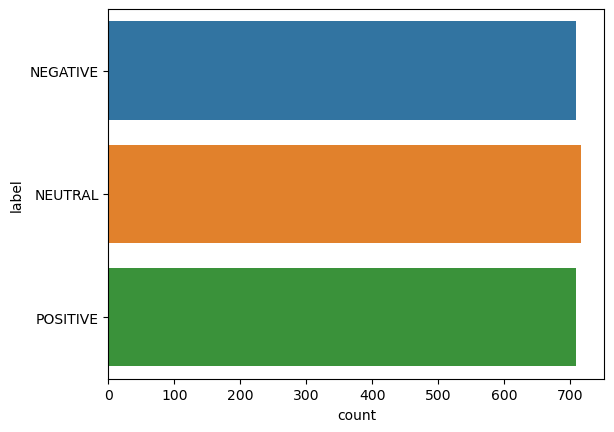

In [11]:
sns.countplot(y = df['label'])

### Split the dataset into Input & Target Variables

In [8]:
X = df.drop(columns = ['label'])

In [9]:
y = df['label']

### Split the dataset into Training & Testing set

In [10]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Random Forest Model

In [12]:
model = RandomForestClassifier()

In [13]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
model.score(X_train,y_train)

1.0

### Make predictions with X_test

In [16]:
y_pred = model.predict(X_test)

### Model Evaluation

In [18]:
accuracy_score(y_test,y_pred)

0.990632318501171

<Axes: >

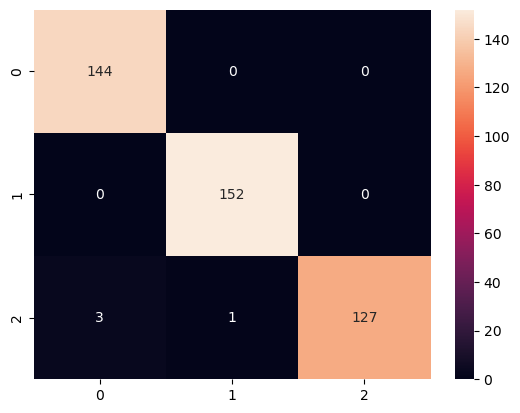

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True,fmt = 'd')

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.98      1.00      0.99       144
     NEUTRAL       0.99      1.00      1.00       152
    POSITIVE       1.00      0.97      0.98       131

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



***